## <font color='red'>Segmentación mediante umbral (Thresholding segmentation)</font>


La segmentación por umbral (**Thresholding segmentation**) es el primer paso en cualquier proceso de segmentación. Consiste en en separar partes de la imagen que se encuentren entre dos (o más) niveles de gris determinados, llamados umbrales. 

Este método se basa principalmente en el **histograma de la imagen**.

Así, por ejemplo, es frecuente separar imágenes térmicas de esta manera, donde separar partes oscuras de las brillantes equivale a extraer los objetos brillantes de los fríos que, en general, corresponden al fondo carente de interés.



# Importar las librerias necesarias

In [12]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

#!pip3 install opencv-python
#! pip install --upgrade scikit-image

import cv2
from skimage import io, img_as_ubyte
from skimage.filters import threshold_multiotsu
from skimage import color, morphology
from skimage.morphology import square


# Importar y mostrar las imágenes a segmentar
Consideramos una imagén a la que hemos añadido ruido gaussiano.

Text(0.5, 1.0, 'Original image plus noise')

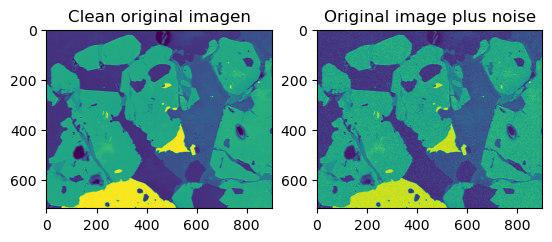

In [13]:
# Read an image using skimage
# image = io.imread("images/BSE_25sigma_noisy.jpg",as_gray=True)   

# read an image using opencv
image0 = cv2.imread("images/BSE.jpg",0)
image1 = cv2.imread("images/BSE_25sigma_noisy.jpg",0)
plt.subplot(121)
plt.imshow(image0)
plt.title('Clean original imagen')
plt.subplot(122)
plt.imshow(image1)
plt.title('Original image plus noise')

# Obtener el histograma

Text(0.5, 1.0, 'Original image plus noise')

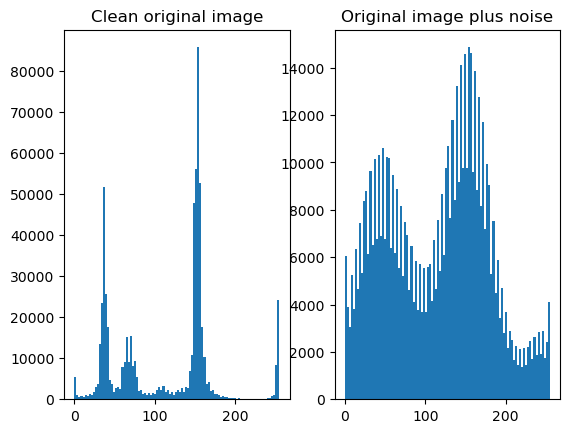

In [14]:
#plot an histogram
#plt.hist(image.ravel(), bins=100);
plt.subplot(121)
plt.hist(image0.flat, bins=100, range=(0,255));
plt.title('Clean original image')

plt.subplot(122)
plt.hist(image1.flat, bins=100, range=(0,255));
plt.title('Original image plus noise')

# Segmentación mediante el método de Otsu

Consulta las diapositivas del tema 10 para conocer el método de Otsu. La referencia original acerca de este algoritmo es:

Liao, P-S., Chen, T-S. and Chung, P-C. "A fast algorithm for multilevel thresholding" Journal of Information Science and Engineering 17 (5): 713-727, 2001


## Comparación de los métodos de umbralización: 

*  Global thresholding
*  Otsu thresholding

Para llevar a cabo esta comparación, consideramos una imagen con ruido.

## A- Segmentación binaria


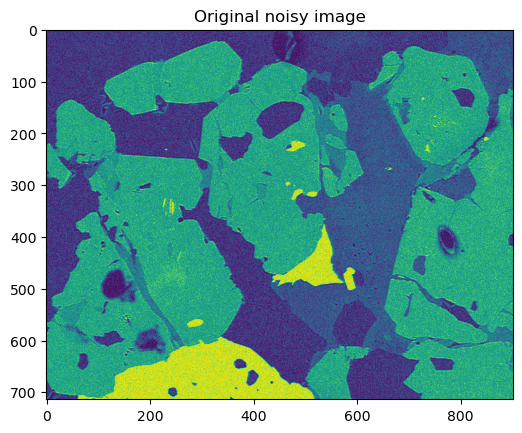

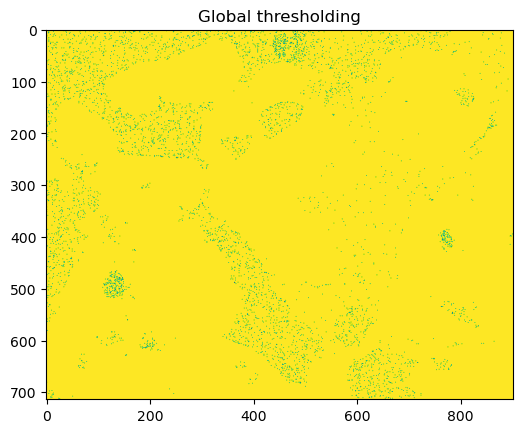

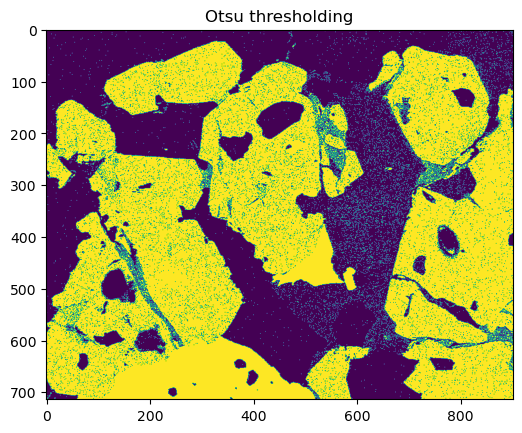

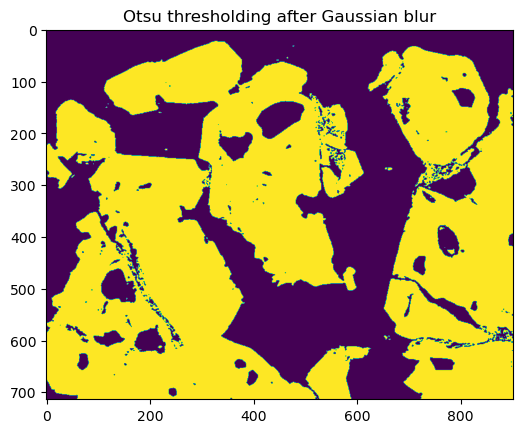

In [30]:
# En este caso vamos a utilizar Opencv en lugar de scikit-image 


# global thresholding
ret1,th1 = cv2.threshold(image1,1,255,cv2.THRESH_BINARY)


# Otsu's thresholding
ret2,th2 = cv2.threshold(image1,1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Otsu's thresholding after Gaussian filtering: 
# We apply a Gaussian blur before thresholding
blur = cv2.GaussianBlur(image1,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Plot all images
plt.imshow(image1)
plt.title('Original noisy image')
plt.show()

# global thresholding
plt.imshow(th1)
plt.title('Global thresholding')
plt.show()

# Otsu's thresholding
plt.imshow(th2)
plt.title('Otsu thresholding')
plt.show()

# Otsu's thresholding after Gaussian filtering: 
plt.imshow(th3)
plt.title('Otsu thresholding after Gaussian blur')


plt.show()

## B- Segmentación multi-umbral

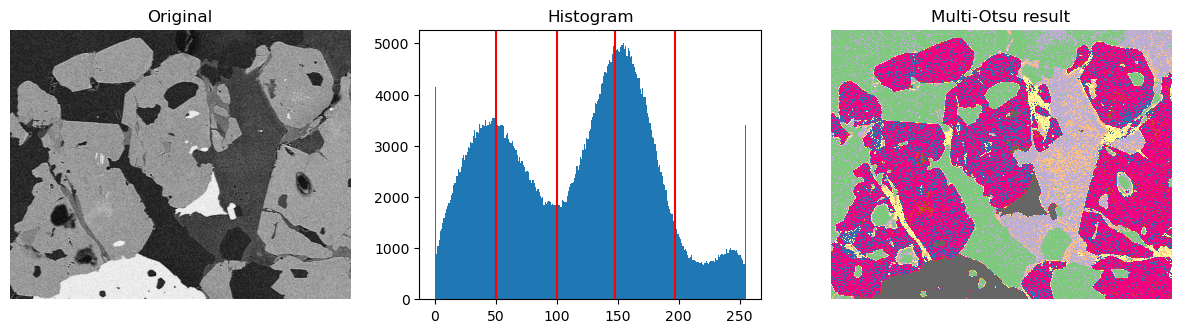

In [39]:

# thresholding the noisy image
thresholds = threshold_multiotsu(image1, classes=5)

# Segment the original noisy image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(image1, bins=thresholds)

#output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8
#plt.imsave("images/Segmented_image.jpg", output)


#Show the input image, thresholds on the histogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))

# Plotting the original image.
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the four thresholds obtained from
# multi-Otsu.
# The argument image.ravel() return a flattened array

ax[1].hist(image1.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

Como se puede apreciar la imagen segmentada presenta mucho ruido que se refleja mediante la presencia de muchos pequeños agurejos.



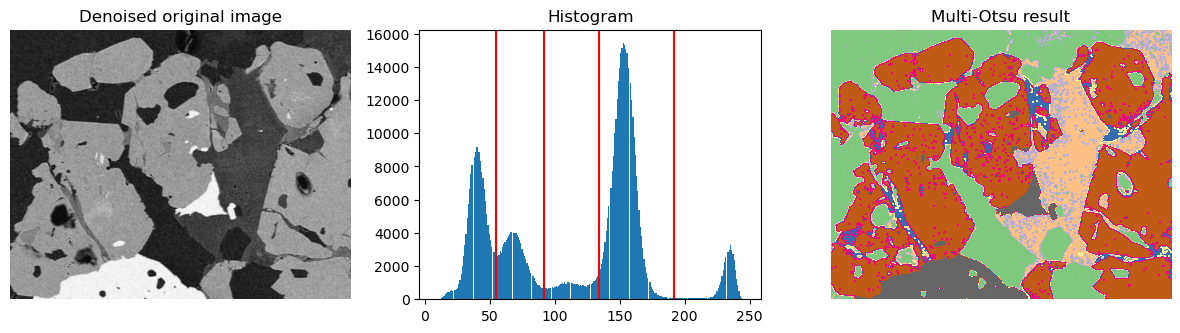

In [40]:

# thresholding the denoised image
thresholds = threshold_multiotsu(blur, classes=5)

# Segment the original noisy image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(blur, bins=thresholds)

#output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8
#plt.imsave("images/Segmented_image.jpg", output)


#Show the input image, thresholds on the histogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))

# Plotting the original image.
ax[0].imshow(blur, cmap='gray')
ax[0].set_title('Denoised original image')
ax[0].axis('off')

# Plotting the histogram and the four thresholds obtained from
# multi-Otsu.
# The argument image.ravel() return a flattened array

ax[1].hist(blur.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()